In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft

In [3]:
colnames = ['X','Y']
lsf = pd.read_csv('10avg_ramlak.csv', names=colnames, header=None)
lsf.head()
lsf['derivative'] = np.gradient(lsf['Y'], lsf['X'])  # Use np.gradient for efficient calculation

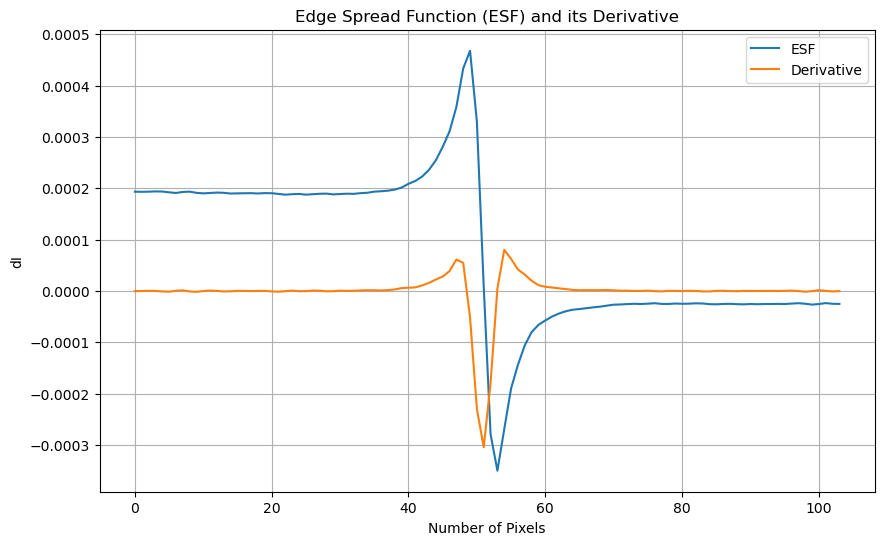

In [4]:
# Plot the LSF and its derivative
plt.figure(figsize=(10, 6))
plt.plot(lsf['X'], lsf['Y'], label='ESF')
plt.plot(lsf['X'], lsf['derivative'], label='Derivative')
plt.title("Edge Spread Function (ESF) and its Derivative")
plt.xlabel("Number of Pixels")
plt.ylabel("dI")
plt.grid(True)
plt.legend()
plt.show()

# Extract the derivative values
lsf_derivative_values = lsf['derivative'].values

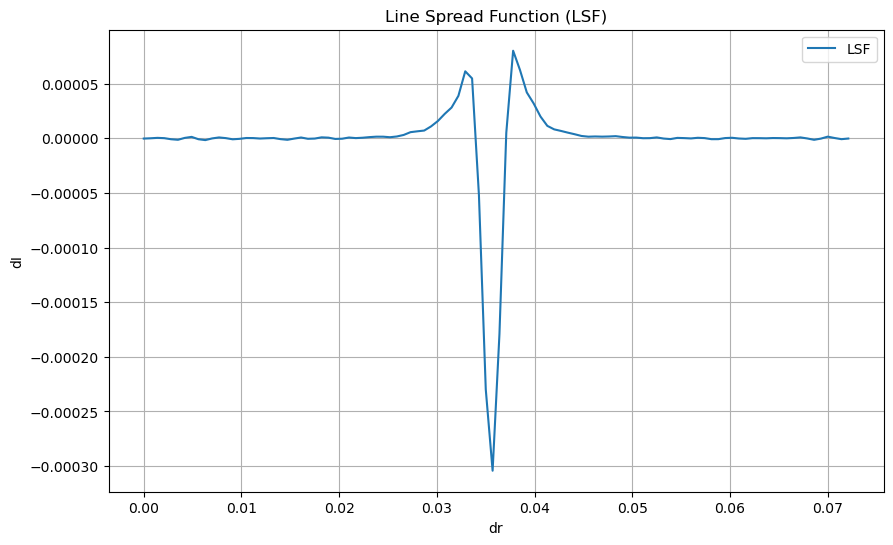

In [5]:
plt.figure(figsize=(10, 6))
# scale x axis by pixel size? maybe should be 0.0007?
lsf['X'] = lsf['X'].multiply(0.0007)
plt.plot(lsf['X'], lsf['derivative'], label='LSF')
plt.title("Line Spread Function (LSF)")
plt.xlabel("dr")
plt.ylabel("dI")
plt.grid(True)
plt.legend()
plt.show()


Take 1-d discrete fourier transform of the lsf
https://docs.scipy.org/doc/scipy/tutorial/fft.html 

(-0.01, 0.7)

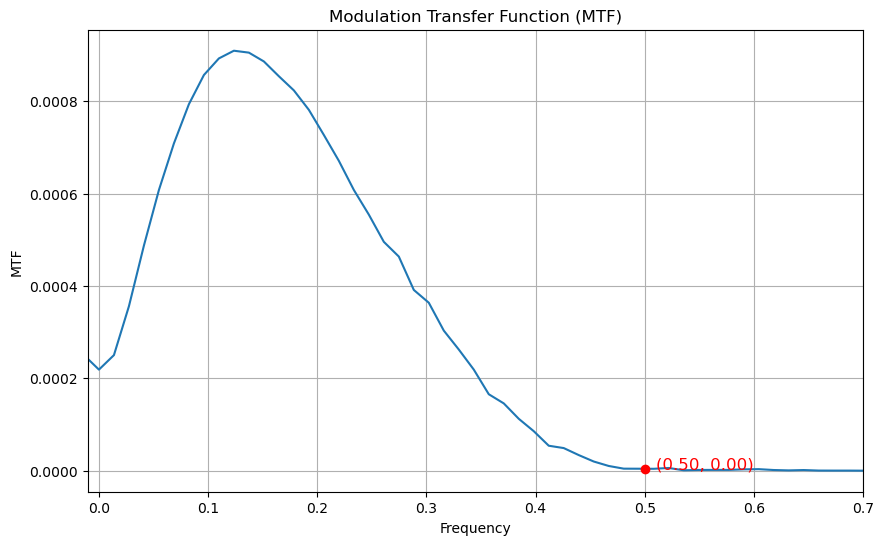

In [6]:
# Convert the LSF values from pandas series to numpy array to avoid compatibility issues
#lsf_values_np = lsf_values.to_numpy()
lsf_values_np = lsf_derivative_values 
# Perform Fourier Transform on the LSF values to obtain the MTF
mtf = np.abs(fft(lsf_values_np))

# Generate frequency axis for MTF plot
# frequencies = np.fft.fftfreq(len(lsf_values_np), d=(0.7))
frequencies = np.fft.fftfreq(len(lsf_values_np), d=(0.7))

# Sort the frequencies and corresponding MTF values for proper plotting
sorted_indices = np.argsort(frequencies)
sorted_frequencies = frequencies[sorted_indices]
sorted_mtf = mtf[sorted_indices]
# Assuming downsampled_frequencies and downsampled_mtf are already defined from previous operations

# Define the x-value where you want to mark the point (0.5 cycles/mm in this case)
x_value = 0.5

# Find the closest x-value in the data and the corresponding y-value
y_value = np.interp(x_value, sorted_frequencies, sorted_mtf)
# Preparing the plot
plt.figure(figsize=(10, 6))
plt.plot(sorted_frequencies, sorted_mtf)
plt.title("Modulation Transfer Function (MTF)")
plt.xlabel("Frequency")
plt.ylabel("MTF")
plt.grid(True)

# Marking the specific point
plt.plot(x_value, y_value, 'ro')  # 'ro' means a red circle marker
# Annotating the point
plt.text(x_value + 0.01, y_value, f'({x_value:.2f}, {y_value:.2f})', fontsize=12, color='red')


plt.xlim(-0.01, 0.7)


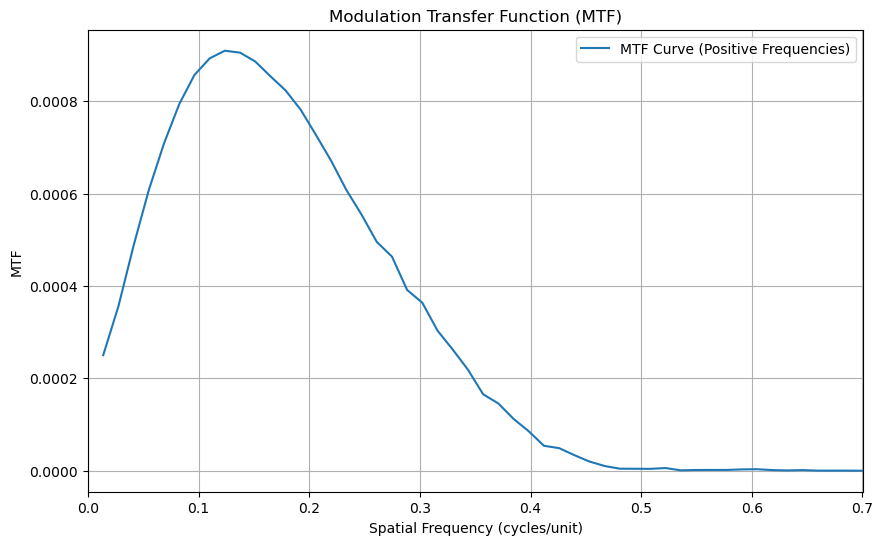

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming sorted_frequencies and sorted_mtf are already defined

# Filter to include only positive frequencies for analysis
positive_indices = sorted_frequencies > 0
positive_frequencies = sorted_frequencies[positive_indices]
positive_mtf = sorted_mtf[positive_indices]

# Re-plot the MTF curve focusing on positive frequencies
plt.figure(figsize=(10, 6))
plt.plot(positive_frequencies, positive_mtf, label="MTF Curve (Positive Frequencies)")
plt.title("Modulation Transfer Function (MTF)")
plt.xlabel("Spatial Frequency (cycles/unit)")
plt.ylabel("MTF")
plt.grid(True)
plt.legend()
plt.xlim(0, max(positive_frequencies))
plt.show()


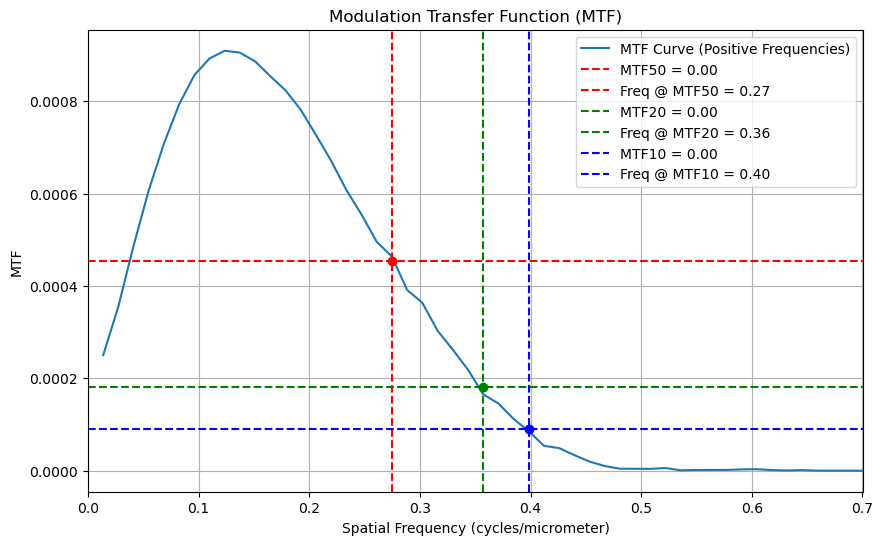

MTF50 Frequency: 0.275 cycles/micrometer
MTF20 Frequency: 0.357 cycles/micrometer
MTF10 Frequency: 0.398 cycles/micrometer


In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming positive_frequencies and positive_mtf are already defined

# Step 1: Identify the maximum value of the MTF
max_mtf = positive_mtf.max()

# Step 2: Calculate the MTF50, MTF20, and MTF10 values
mtf50_value = 0.5 * max_mtf
mtf20_value = 0.2 * max_mtf
mtf10_value = 0.1 * max_mtf

# Step 3: Find the frequencies corresponding to MTF50, MTF20, and MTF10
mtf50_index = np.abs(positive_mtf - mtf50_value).argmin()
mtf20_index = np.abs(positive_mtf - mtf20_value).argmin()
mtf10_index = np.abs(positive_mtf - mtf10_value).argmin()

mtf50_frequency = positive_frequencies[mtf50_index]
mtf20_frequency = positive_frequencies[mtf20_index]
mtf10_frequency = positive_frequencies[mtf10_index]

# Step 4: Plot the MTF curve and mark the MTF50, MTF20, and MTF10 points
plt.figure(figsize=(10, 6))
plt.plot(positive_frequencies, positive_mtf, label="MTF Curve (Positive Frequencies)")

# Marking MTF50
plt.axhline(y=mtf50_value, color='r', linestyle='--', label=f'MTF50 = {mtf50_value:.2f}')
plt.axvline(x=mtf50_frequency, color='r', linestyle='--', label=f'Freq @ MTF50 = {mtf50_frequency:.2f}')
plt.plot(mtf50_frequency, mtf50_value, 'ro')

# Marking MTF20
plt.axhline(y=mtf20_value, color='g', linestyle='--', label=f'MTF20 = {mtf20_value:.2f}')
plt.axvline(x=mtf20_frequency, color='g', linestyle='--', label=f'Freq @ MTF20 = {mtf20_frequency:.2f}')
plt.plot(mtf20_frequency, mtf20_value, 'go')

# Marking MTF10
plt.axhline(y=mtf10_value, color='b', linestyle='--', label=f'MTF10 = {mtf10_value:.2f}')
plt.axvline(x=mtf10_frequency, color='b', linestyle='--', label=f'Freq @ MTF10 = {mtf10_frequency:.2f}')
plt.plot(mtf10_frequency, mtf10_value, 'bo')

plt.title("Modulation Transfer Function (MTF)")
plt.xlabel("Spatial Frequency (cycles/micrometer)")
plt.ylabel("MTF")
plt.grid(True)
plt.legend()
plt.xlim(0, max(positive_frequencies))
plt.show()

# Print the frequencies corresponding to MTF20 and MTF10
print(f'MTF50 Frequency: {mtf50_frequency:.3f} cycles/micrometer')
print(f'MTF20 Frequency: {mtf20_frequency:.3f} cycles/micrometer')
print(f'MTF10 Frequency: {mtf10_frequency:.3f} cycles/micrometer')


